# Load station data based on NetCDF files

In this example we show how to load station data based on NetCDF files.
The data is loaded with the pymepps package. Thanks to Ingo Lange we could use original data from the Wettermast for this example. In the following the data is loaded, plotted and saved as json file.

In [8]:
import pymepps
import matplotlib.pyplot as plt

We could use the global pymepps open_station_dataset function to open the Wettermast data.
We have to specify the data path and the data type.

In [2]:
wm_ds = pymepps.open_station_dataset('../data/station/wettermast.nc', 'nc')

100%|██████████| 1/1 [00:00<00:00, 49.15it/s]


In [3]:
print(wm_ds)

TSDataset
---------
File handlers: 1
Variables: ['TT002_M10', 'lat', 'lon', 'product', 'station_details', 'time_bnds', 'zsl']
Lonlat: None


Now we could extract the temperature in 2 m height. For this we use the select method of the resulted dataset.

In [4]:
t2m = wm_ds.select('TT002_M10')

100%|██████████| 1/1 [00:00<00:00, 36.04it/s]


In [5]:
print(type(t2m))
print(t2m)

<class 'pandas.core.series.Series'>
time
2016-01-01 00:00:00    0.69
2016-01-01 00:10:00    1.36
2016-01-01 00:20:00    1.16
2016-01-01 00:30:00    1.07
2016-01-01 00:40:00    0.85
2016-01-01 00:50:00    0.53
2016-01-01 01:00:00    0.23
2016-01-01 01:10:00    0.07
2016-01-01 01:20:00    0.40
2016-01-01 01:30:00    0.32
2016-01-01 01:40:00    0.25
2016-01-01 01:50:00    0.35
2016-01-01 02:00:00    0.26
2016-01-01 02:10:00    0.15
2016-01-01 02:20:00    0.59
2016-01-01 02:30:00    0.56
2016-01-01 02:40:00    0.79
2016-01-01 02:50:00    1.07
2016-01-01 03:00:00    1.13
2016-01-01 03:10:00    1.12
2016-01-01 03:20:00    1.25
2016-01-01 03:30:00    1.23
2016-01-01 03:40:00    0.95
2016-01-01 03:50:00    0.81
2016-01-01 04:00:00    0.72
2016-01-01 04:10:00    0.80
2016-01-01 04:20:00    0.72
2016-01-01 04:30:00    0.70
2016-01-01 04:40:00    0.63
2016-01-01 04:50:00    0.62
                       ... 
2016-01-05 19:00:00   -5.34
2016-01-05 19:10:00   -5.35
2016-01-05 19:20:00   -5.31
2016-01

We could see that the resulting temperature is a normal pandas.Series. So it is possible to use all pandas methods, e.g. plotting of the Series.

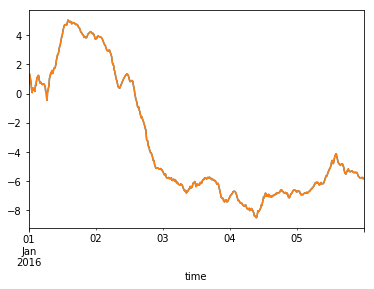

In [9]:
t2m.plot()
plt.show()

Pymepps uses an accessor to extend the pandas functionality. The accessor could be accessed with Series.pp. At the moment there is only a lonlat attribute, update, save and load method defined, but it is planned to expand the number of additional methods.

In [11]:
print(t2m.pp.lonlat)

None


We could see that the logitude and latitude are None at the moment, because we haven't set the yet. we could either set them directly or set the coordintes in the open_station_dataset function with the lonlat argument.